Pbm 1, 2, 5, 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from datetime import datetime

In [4]:
bday = datetime(2019, 8, 1)
print(bday)

2019-08-01 00:00:00


#### Pbm 1

In [45]:
df = pd.read_csv('DJIA.csv', infer_datetime_format=True)
df['DATE'] = pd.to_datetime(df.DATE)
df = df.set_index('DATE')
df['VALUE'] = df['VALUE'].replace('.', np.nan)
df.dropna(inplace=True)
df['VALUE'] = df['VALUE'].astype(float)

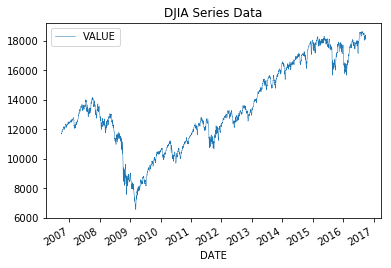

In [51]:
df.plot(lw=0.5)
plt.title('DJIA Series Data')
plt.show()

#### Pbm 2

In [60]:
df = pd.read_csv('paychecks.csv', header=None, names=['PAY'])
df

,PAY
0,1122.26
1,921.03
2,962.46
3,1035.97
4,1078.59
5,1110.97
6,1121.91
7,992.83
8,1103.23
9,944.66


In [68]:
#checks are paid on the first and third Fridays of the month
df['Date'] = pd.date_range(start='3/13/2008 12:00', periods=93, freq='2W-Fri')
df = df.set_index('Date')

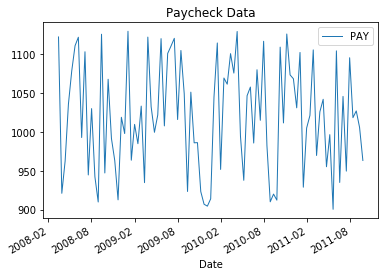

In [71]:
df.plot(lw=1)
plt.title('Paycheck Data')
plt.show()

### Pbm 5

In [16]:
df = pd.read_csv('DJIA.csv', infer_datetime_format=True)
df['DATE'] = pd.to_datetime(df.DATE)
df = df.set_index('DATE')
df['VALUE'] = df['VALUE'].replace('.', np.nan)
df.dropna(inplace=True)
df['VALUE'] = df['VALUE'].astype(float)

In [11]:
df.loc[df['VALUE'].idxmax()]

VALUE    18636.05
Name: 2016-08-15 00:00:00, dtype: float64

In [10]:
df.loc[df['VALUE'].idxmin()]

VALUE    6547.05
Name: 2009-03-09 00:00:00, dtype: float64

In [25]:
df['year'] = df.index.year
df['month'] = df.index.month

In [33]:
monthagg = df.groupby(['year', 'month'])['VALUE'].max()-\
            df.groupby(['year', 'month'])['VALUE'].min()

In [45]:
print("The month with the largest gain is ", monthagg.argmax(), "gain is", monthagg.max()) 

The month with the largest gain is  (2008, 10) gain is 2655.2999999999993


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


In [46]:
print("The month with the largest loss is ", monthagg.argmin(), "loss is", monthagg.min()) 

The month with the largest loss is  (2006, 9) loss is 39.38000000000102


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


#### Pbm 6

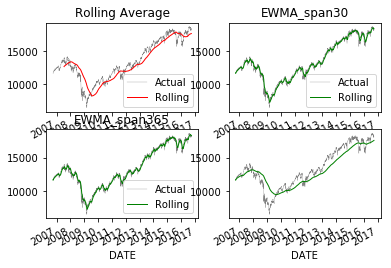

In [76]:
# Rolling Functions
N = 10000
bias = 0.01
ax1 = plt.subplot(221)
df['VALUE'].plot(color='gray', lw=0.3, ax=ax1)
df['VALUE'].rolling(window=200).mean().plot(color='r', lw=1, ax=ax1)
ax1.legend(['Actual', 'Rolling'], loc='lower right')
ax1.set_title('Rolling Average')

ax2 = plt.subplot(222)
df['VALUE'].plot(color='gray', lw=0.3, ax=ax2)
df['VALUE'].ewm(span=30).mean().plot(color='g', lw=1, ax=ax2)
ax2.legend(['Actual', 'Rolling'], loc='lower right')
ax2.set_title('EWMA_span30')

ax3 = plt.subplot(223)
df['VALUE'].plot(color='gray', lw=0.3, ax=ax3)
df['VALUE'].ewm(span=30).mean().plot(color='g', lw=1, ax=ax3)
ax3.legend(['Actual', 'Rolling'], loc='lower right')
ax3.set_title('EWMA_span120')

ax4 = plt.subplot(224)
df['VALUE'].plot(color='gray', lw=0.3, ax=ax4)
df['VALUE'].ewm(span=365).mean().plot(color='g', lw=1, ax=ax4)
ax3.legend(['Actual', 'Rolling'], loc='lower right')
ax3.set_title('EWMA_span365')

plt.show()

In [59]:
#object that could be aggregated with mean(), std(), var(), max()
#df['VALUE'].rolling(window=200).min()